In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from ipynb.fs.full.Funciones_basicas import *
from ipynb.fs.full.Algoritmos import *
from ipynb.fs.full.Visualizaciones import *

In [3]:
from collections import deque
import random

In [4]:
path_nodes = '../data_random/TG.txt'
nodes_location = pd.read_csv(path_nodes, sep=" ", header=None, names = ['ID', 'Longitude', 'Latitude'])
path_edges = '../data_random/TG_edge.txt'
edges_location = pd.read_csv(path_edges, sep=" ", header=None, names = ['edge_ID', 'ID_1', 'ID_2', 'Distance'])
edges_location.head()

,edge_ID,ID_1,ID_2,Distance
0,0,0,7388,1.410871
1,1,0,5744,1.069441
2,2,0,5835,34.071991
3,3,0,3647,14.796446
4,4,1,4232,136.073166


In [5]:
S = set()
for index, row in edges_location.iterrows():
    origin = row['ID_1']
    dest = row['ID_2']
    S.add(origin)
    S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

        
G_SJ = nx.Graph()
for index, row in edges_location.iterrows():
    origin = row['ID_1']
    dest = row['ID_2']
    G_SJ.add_edge(id_[origin], id_[dest])
    
N_ = l

In [6]:
def by_distance(element):
    return element[1]


def get_closest(G, locations, node, q):
    # get position of node
    x = locations[locations['ID'] == _id[node]]['Longitude'].iloc[0]
    y = locations[locations['ID'] == _id[node]]['Latitude'].iloc[0]
    
    #Neighbors
    ng = list(G.neighbors(node))
    
    # Calculate distances
    distances = list()
    for n in ng:
        n_id = _id[n]
        x_row = locations[locations['ID'] == n_id]['Longitude'].iloc[0]
        y_row = locations[locations['ID'] == n_id]['Latitude'].iloc[0]
        d = (x - x_row)**2 + (y - y_row)**2
        distances.append((n, d))
    
    # Order by distance and return q closest
    distances.sort(key = by_distance)    
    return [i[0] for i in distances[:q]] 

In [7]:
def get_random_tree(G, nodes):
    new_G = nx.DiGraph()
    N = len(G.nodes())
    WTP = random.choice(list(G.nodes()))
    V = [0] * N;  V[WTP] = 1
    Q = deque([]); Q.append(WTP)
    while Q:
        if len(new_G.nodes()) < nodes:
            random.shuffle(Q)
            u = Q.popleft()
            for v in G.neighbors(u):
                if not V[v]:
                    Q.append(v)
                    new_G.add_edge(v,u)
                    V[v] = 1
        else:
            break
    return new_G, WTP

def add_extra_edges(T, G, locations, ratio, edge_limit):
    nodes = list(T.nodes())
    counter = 0
    perturbed = random.choices(nodes, k = math.ceil(len(nodes) * ratio))
    for node in perturbed:
        added = False
        if len(list(T.predecessors(node))) < edge_limit:
            closest = [i for i in get_closest(G, locations, node, 7) if i in nodes]
            if closest:
                closest = closest[0]
                T_neigbors = list(T.predecessors(node)) + list(T.successors(node))
                if len(list(T.predecessors(closest))) < edge_limit and  closest not in T_neigbors:
                    T.add_edge(node, closest)
                    added = True
                    #print('added')
        if not added and counter < len(nodes):
            perturbed.append(random.choice(nodes))
            counter += 1
    return T


In [8]:
def generate_random_graph(G, nodes, locations, ratio, edge_limit):
    T, WTP = get_random_tree(G, nodes)
    NG = add_extra_edges(T,G, locations, ratio, edge_limit)
    return NG, WTP
        

In [10]:
T, _ = get_random_tree(G_SJ, 4500)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_function(R, N_)
iters = simulate(R, N_, F, r, T.nodes())

Optimal Steps: 9
Result 6662: 9    acc: 9.0    ks: [3, 6, 20, 19, 6, 9, 6, 3, 1]
17663!!!
Result 17662: 9    acc: 9.0    ks: [3, 6, 20, 19, 6, 9, 6, 3, 1]
Result 18044: 8    acc: 8.666666666666666    ks: [3, 6, 20, 19, 6, 9, 6, 2]
Result 6663: 9    acc: 8.75    ks: [3, 6, 20, 19, 6, 9, 6, 3, 1]
Result 9215: 7    acc: 8.4    ks: [3, 6, 20, 19, 6, 1, 1]
Result 5881: 8    acc: 8.333333333333334    ks: [3, 6, 20, 19, 6, 9, 6, 3]
Result 6728: 8    acc: 8.285714285714286    ks: [3, 6, 20, 19, 6, 9, 6, 1]
Result 10760: 7    acc: 8.125    ks: [3, 6, 20, 19, 6, 1, 1]
Result 15985: 9    acc: 8.222222222222221    ks: [3, 6, 20, 19, 6, 1, 2, 2, 1]
Result 11173: 9    acc: 8.3    ks: [3, 6, 20, 19, 6, 1, 2, 2, 1]
Result 2699: 9    acc: 8.363636363636363    ks: [3, 6, 20, 19, 6, 9, 6, 2, 1]
Result 18087: 9    acc: 8.416666666666666    ks: [3, 6, 20, 19, 6, 9, 6, 2, 1]
Result 4410: 7    acc: 8.307692307692308    ks: [3, 6, 20, 1, 1, 1, 1]
Result 10176: 9    acc: 8.357142857142858    ks: [3, 6, 20, 19,

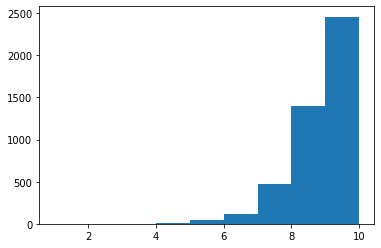

In [11]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [12]:
T, _ = get_random_tree(G_SJ, 9000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_function(R, N_)
iters = simulate(R, N_, F, r, T.nodes())

Optimal Steps: 10
Result 7250: 9    acc: 9.0    ks: [2, 9, 2, 2, 2, 2, 1, 1, 1]
13758!!!
Result 11837: 7    acc: 8.0    ks: [2, 9, 2, 2, 2, 2, 1]
Result 10998: 8    acc: 8.0    ks: [2, 9, 2, 2, 2, 5, 2, 2]
Result 16053: 8    acc: 8.0    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 10701: 10    acc: 8.4    ks: [2, 9, 2, 2, 2, 5, 2, 2, 1, 1]
Result 15615: 7    acc: 8.166666666666666    ks: [2, 9, 2, 2, 2, 5, 1]
Result 14952: 10    acc: 8.428571428571429    ks: [2, 9, 2, 2, 2, 5, 2, 2, 1, 1]
Result 11365: 8    acc: 8.375    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 1273: 8    acc: 8.333333333333334    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 5832: 8    acc: 8.3    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 13466: 8    acc: 8.272727272727273    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 11267: 9    acc: 8.333333333333334    ks: [2, 9, 2, 2, 2, 2, 1, 1, 1]
Result 14229: 8    acc: 8.307692307692308    ks: [2, 9, 2, 2, 2, 2, 1, 1]
Result 16881: 9    acc: 8.357142857142858    ks: [2, 9, 2, 2, 2, 2, 1, 1, 1]
Result 2208: 10    

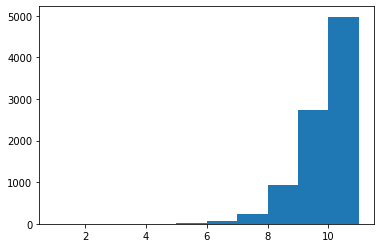

In [13]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [14]:
T, _ = get_random_tree(G_SJ, 4500)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_K_function(R, 5, N_)
iters = simulate(R, N_, F, r, T.nodes())

Optimal Steps: 6
Result 10650: 6    acc: 6.0    ks: [4, 2, 5, 5, 5, 4]
13131!!!
Result 10954: 5    acc: 5.5    ks: [4, 2, 5, 1, 2]
Result 6197: 5    acc: 5.333333333333333    ks: [4, 2, 5, 1, 2]
Result 2439: 5    acc: 5.25    ks: [4, 2, 5, 1, 2]
Result 7311: 5    acc: 5.2    ks: [4, 4, 2, 1, 4]
Result 11337: 6    acc: 5.333333333333333    ks: [4, 2, 5, 2, 3, 4]
Result 18154: 6    acc: 5.428571428571429    ks: [4, 2, 5, 5, 5, 4]
Result 3133: 5    acc: 5.375    ks: [4, 4, 2, 2, 4]
Result 12496: 6    acc: 5.444444444444445    ks: [4, 4, 2, 1, 4, 3]
Result 3004: 6    acc: 5.5    ks: [4, 2, 5, 5, 5, 4]
Result 6469: 6    acc: 5.545454545454546    ks: [4, 2, 5, 5, 5, 4]
Result 17416: 6    acc: 5.583333333333333    ks: [4, 2, 5, 2, 3, 4]
Result 14039: 6    acc: 5.615384615384615    ks: [4, 2, 5, 2, 3, 4]
Result 1181: 6    acc: 5.642857142857143    ks: [4, 2, 5, 5, 5, 4]
Result 11486: 5    acc: 5.6    ks: [4, 2, 5, 5, 5]
Result 3429: 6    acc: 5.625    ks: [4, 2, 5, 5, 5, 4]
Result 8933: 6    a

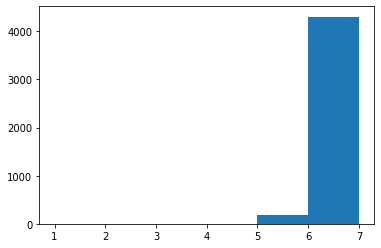

In [15]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [16]:
T, _ = get_random_tree(G_SJ, 9000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

R = T.reverse()
F = get_optimal_K_function(R, 5, N_)
iters = simulate(R, N_, F, r, T.nodes())

Optimal Steps: 7
Result 5658: 7    acc: 7.0    ks: [1, 2, 5, 1, 1, 5, 4]
2956!!!
Result 12495: 6    acc: 6.5    ks: [1, 4, 4, 5, 1, 4]
Result 11555: 7    acc: 6.666666666666667    ks: [1, 2, 5, 1, 1, 5, 4]
Result 8511: 7    acc: 6.75    ks: [1, 2, 5, 1, 1, 5, 4]
Result 11110: 7    acc: 6.8    ks: [1, 2, 5, 5, 4, 4, 3]
Result 12625: 6    acc: 6.666666666666667    ks: [1, 4, 4, 5, 1, 4]
Result 10732: 7    acc: 6.714285714285714    ks: [1, 2, 5, 5, 4, 4, 3]
Result 12851: 6    acc: 6.625    ks: [1, 4, 4, 5, 1, 4]
Result 2850: 7    acc: 6.666666666666667    ks: [1, 2, 4, 2, 4, 4, 2]
Result 8513: 7    acc: 6.7    ks: [1, 2, 5, 5, 4, 4, 3]
Result 13395: 7    acc: 6.7272727272727275    ks: [1, 2, 5, 5, 4, 4, 2]
Result 7188: 6    acc: 6.666666666666667    ks: [1, 2, 5, 5, 4, 3]
Result 8509: 7    acc: 6.6923076923076925    ks: [1, 2, 5, 5, 4, 5, 3]
Result 8510: 7    acc: 6.714285714285714    ks: [1, 2, 5, 5, 4, 4, 3]
Result 12895: 6    acc: 6.666666666666667    ks: [1, 4, 4, 5, 1, 4]
Result 1303

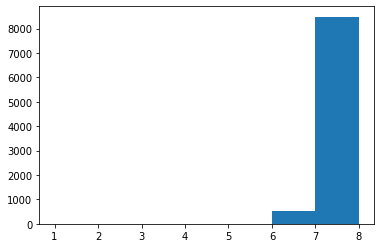

In [17]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [30]:

def greedyAppBasic(G, V_, root, K, limit):
    
    V = V_.copy(); N = len(V)
    E = {u for u in G.nodes() if not V[u]}

    ans = []; tot = 0
    while len(ans) < K:
        
        maxv = 0; u = -1
        for v in E:
            s = len(get_ideal(G, V, v))
            if s > maxv and s <= limit:
                u = v
                maxv = s
        if u == -1:
            break
        
        V, _ = visit(G, V, u)
        ans.append(u); tot += maxv
        E.remove(u)
        
    return ans, tot

In [36]:
def simulate_basic(G, N, root, k, S, verbose=False):
    
    map_prev = {}
    
    iters = []; N_ = len(G.nodes())

    for r in S:

        if verbose:
            print(r)

        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0] * N

        R = N_
        for t in range(100):
            
            R = N_ - sum(V)
            P = []; sP = 0
            
            # if not verbose:
            #     print("                                                           ", end="\r")
            #     print(f"Search {r}: {t + 1}    now: {R}", end="\r")
            
            if verbose:
                print("it,", t, R)
                
            nn = 0
            for i in range(N):
                if V[i]:
                    nn += 2**i
                    
            if nn in map_prev.keys():
                P = map_prev[nn]
            else:
                if R >= k:
                    low = 0; high = R
                    while low != high:
                        mid = (low + high) // 2
                        P, sP = greedyAppBasic(G, V, root, k, mid)
                        if R - sP < mid:
                            high = mid
                        else:
                            low = mid + 1
                    P, sP = greedyAppBasic(G, V, root, k, low)
                    
                    if verbose:
                        print("pre low:", low, R - sP, len(P))

                    if low > 1:
                        P_, sP_ = greedyAppBasic(G, V, root, k, low - 1)

                        if verbose:
                            print("low:", low, R - sP, R - sP_, len(P), len(P_))

                        if len(P_) and (abs((R - sP_) - (low - 1)) < abs((R - sP) - low) or (len(P) == 1 and sP == R)):
                            P = P_; sP = sP_
                else:
                    P, sP = greedyAppBasic(G, V, root, k, 1)

                map_prev[nn] = P
    
            if verbose:
                print("nx", len(P), sum([CV[u] for u in P]), N_ - sum(V))
                print("P: ", ' '.join([str(p) for p in P]))
#                 plot_sample_no_intersections(G, V, P, geometry, _id)

            if sum([CV[u] for u in P]):
                V_ = [-1 * V[u] for u in range(N)]
                for u in P:
                    if CV[u]:
                        I = get_ideal(G, V, u)
                        for v in I:
                            V_[v] += 1

                V = [(V_[u] != sum([CV[u] for u in P])) for u in range(N)]
                
                if verbose:
                    print("if: ", N_ - sum(V))
            
            for u in P:
                if not CV[u]:
                    I = get_ideal(G, V, u)
                    for v in I:
                        V[v] = 1
                        
            size = N_ - sum(V)

            if size == 1:
                iters.append(t + 1)
                print(f"Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")
                break
            if size <= k:
                iters.append(t + 2)
                print(f"Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")
                break
            if t == 99:
                iters.append(100)
                print(f"Result {r}: {iters[-1]}    acc: {sum(iters) / len(iters)}")

    print(sum(iters) / len(iters), max(iters))
    
    return iters

In [37]:
T, _ = get_random_tree(G_SJ, 4500)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

# R = T.reverse()
iters = simulate_basic(T, N_, r, 5, T.nodes())

Result 10509: 6    acc: 6.0
Result 10537: 5    acc: 5.5
Result 10538: 3    acc: 4.666666666666667
Result 10014: 3    acc: 4.25
Result 11115: 3    acc: 4.0
Result 10593: 3    acc: 3.8333333333333335
Result 9924: 3    acc: 3.7142857142857144
Result 10104: 3    acc: 3.625
Result 9789: 3    acc: 3.5555555555555554
Result 11757: 3    acc: 3.5
Result 11145: 3    acc: 3.4545454545454546
Result 11843: 3    acc: 3.4166666666666665
Result 11803: 3    acc: 3.3846153846153846
Result 10052: 6    acc: 3.5714285714285716
Result 10268: 6    acc: 3.7333333333333334
Result 11302: 5    acc: 3.8125
Result 11114: 5    acc: 3.8823529411764706
Result 12004: 5    acc: 3.9444444444444446
Result 9788: 6    acc: 4.052631578947368
Result 10973: 4    acc: 4.05
Result 11889: 5    acc: 4.095238095238095
Result 10324: 2    acc: 4.0
Result 10936: 4    acc: 4.0
Result 11801: 4    acc: 4.0
Result 8926: 3    acc: 3.96
Result 12585: 5    acc: 4.0
Result 9507: 2    acc: 3.925925925925926
Result 10213: 2    acc: 3.857142857

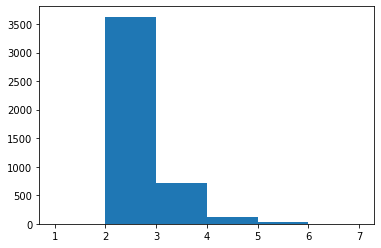

In [38]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [39]:
T, _ = get_random_tree(G_SJ, 9000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

# R = T.reverse()
iters = simulate_basic(T, N_, r, 5, T.nodes())

Result 16930: 5    acc: 5.0
Result 17380: 6    acc: 5.5
Result 17282: 3    acc: 4.666666666666667
Result 17828: 2    acc: 4.0
Result 17425: 6    acc: 4.4
Result 597: 6    acc: 4.666666666666667
Result 17470: 6    acc: 4.857142857142857
Result 17002: 6    acc: 5.0
Result 17921: 2    acc: 4.666666666666667
Result 17610: 6    acc: 4.8
Result 17761: 2    acc: 4.545454545454546
Result 17827: 2    acc: 4.333333333333333
Result 18243: 2    acc: 4.153846153846154
Result 76: 2    acc: 4.0
Result 7557: 2    acc: 3.8666666666666667
Result 21: 2    acc: 3.75
Result 462: 2    acc: 3.6470588235294117
Result 18139: 2    acc: 3.5555555555555554
Result 17086: 5    acc: 3.6315789473684212
Result 18053: 6    acc: 3.75
Result 17666: 6    acc: 3.857142857142857
Result 602: 2    acc: 3.772727272727273
Result 217: 2    acc: 3.6956521739130435
Result 911: 2    acc: 3.625
Result 371: 2    acc: 3.56
Result 18052: 2    acc: 3.5
Result 693: 2    acc: 3.4444444444444446
Result 320: 2    acc: 3.392857142857143
Resu

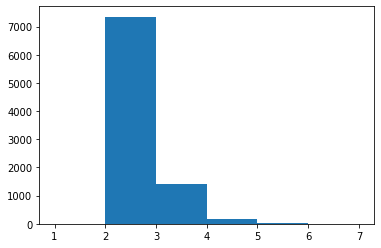

In [40]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [41]:
T, _ = get_random_tree(G_SJ, 18000)

S = []
for n in T.nodes():
    S.append((get_size(T, [0 for i in range(N_)], n), n))

S.sort(reverse=True)

r = S[0][1]

# R = T.reverse()
iters = simulate_basic(T, N_, r, 5, T.nodes())

Result 3247: 6    acc: 6.0
Result 13943: 6    acc: 6.0
Result 10896: 6    acc: 6.0
Result 17701: 6    acc: 6.0
Result 3248: 6    acc: 6.0
Result 3393: 6    acc: 6.0
Result 12812: 6    acc: 6.0
Result 2442: 6    acc: 6.0
Result 3298: 6    acc: 6.0
Result 7389: 6    acc: 6.0
Result 10519: 6    acc: 6.0
Result 2487: 6    acc: 6.0
Result 2822: 6    acc: 6.0
Result 12566: 6    acc: 6.0
Result 17755: 6    acc: 6.0
Result 2419: 6    acc: 6.0
Result 17513: 6    acc: 6.0
Result 1693: 6    acc: 6.0
Result 16004: 6    acc: 6.0
Result 6851: 6    acc: 6.0
Result 1453: 6    acc: 6.0
Result 13846: 6    acc: 6.0
Result 1366: 6    acc: 6.0
Result 5807: 6    acc: 6.0
Result 16965: 6    acc: 6.0
Result 15386: 6    acc: 6.0
Result 1995: 6    acc: 6.0
Result 3105: 6    acc: 6.0
Result 17232: 6    acc: 6.0
Result 13766: 6    acc: 6.0
Result 798: 6    acc: 6.0
Result 1692: 6    acc: 6.0
Result 1141: 6    acc: 6.0
Result 698: 6    acc: 6.0
Result 699: 6    acc: 6.0
Result 1014: 6    acc: 6.0
Result 6165: 6   

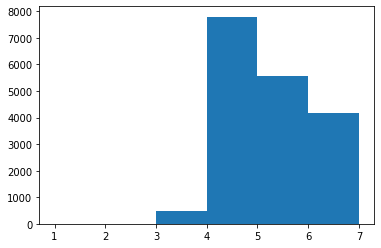

In [42]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()